In [1]:
# Dataset: banknotes.csv, petrol_consumption.csv, iris.csv, wine-class.csv
#location: https://mitu/co.in/dataset

In [3]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Load the the files
df_bn = pd.read_csv('Datasets/banknotes.csv') # Classification
df_pc = pd.read_csv('Datasets/petrol_consumption.csv') #Regression
df_ir = pd.read_csv('Datasets/iris.csv')
df_wc = pd.read_csv('Datasets/wine-class.csv')

In [120]:
df_bn

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Seprate feature as input and target as output

In [121]:
# input as 2-d
# can be done using drop
#x = df_bn.drop('Class', axis=1)
x = df_bn[['Variance', 'Skewness', 'Curtosis', 'Entropy']]

# output as 1-d
y = df_bn['Class']

In [122]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


### Analysis the output value

In [123]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b8ad6193d0>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

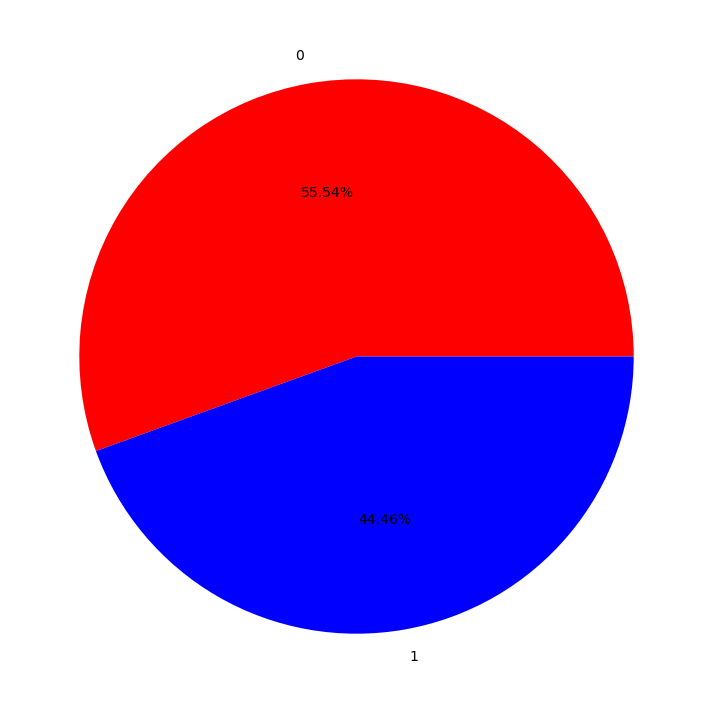

In [124]:
# Pie-Chart
plt.figure(figsize=(16,9))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%', colors='rb')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


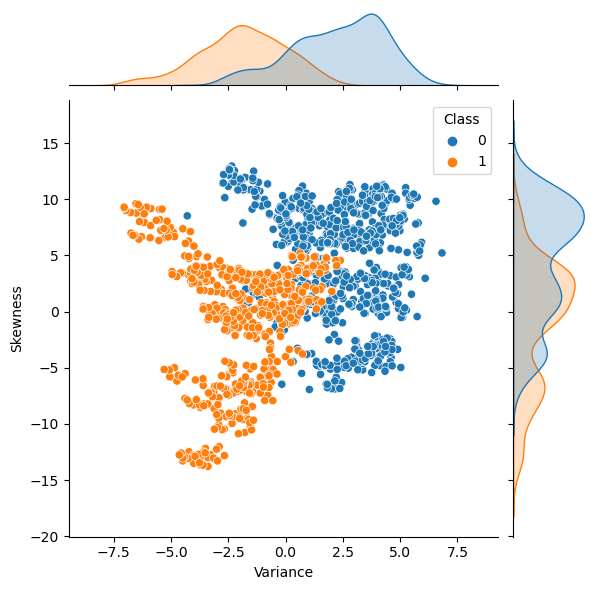

In [125]:
# Joint Plot

sns.jointplot(x = 'Variance', y = 'Skewness', data = df_bn, hue = 'Class')

### Display a pair plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

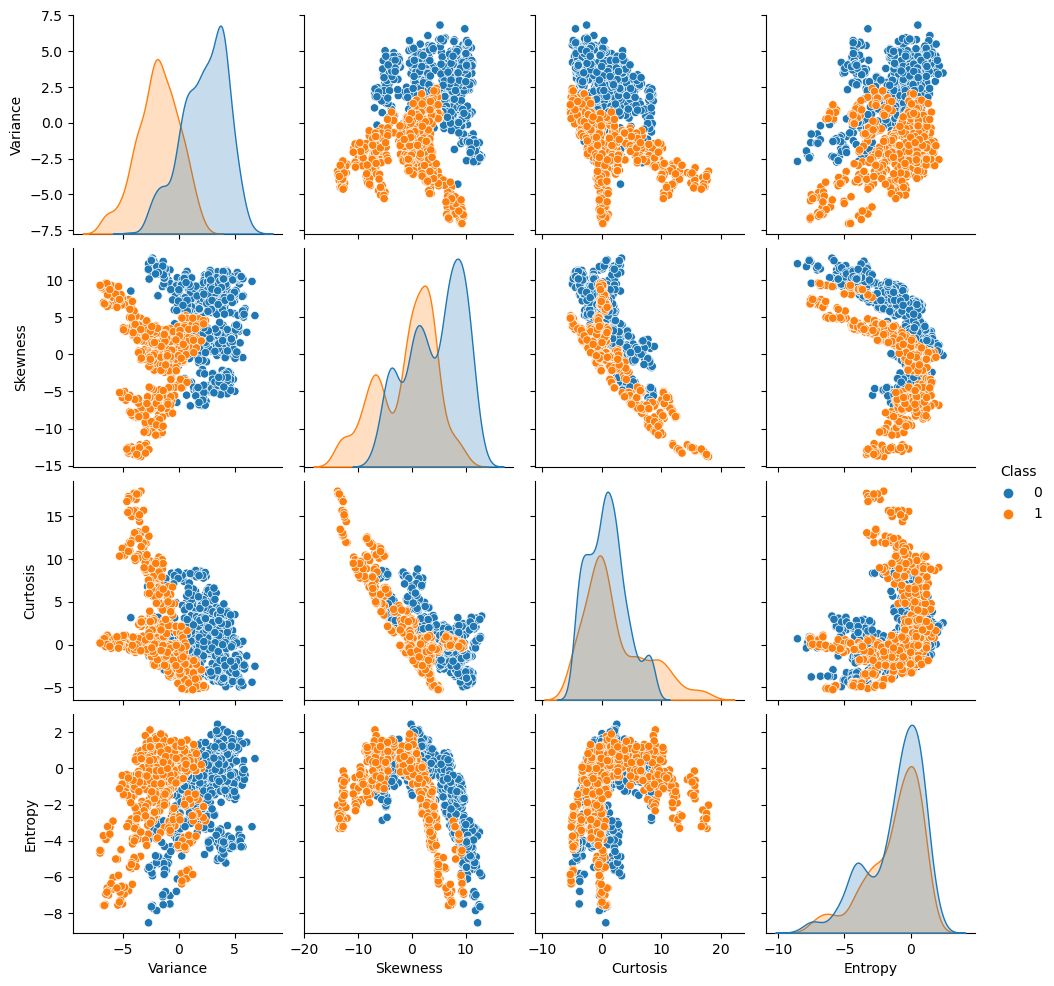

In [126]:
sns.pairplot(df_bn, hue='Class')

### Cross validation

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

### Build the Model

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [131]:
# Train the algorithm
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [132]:
type(clf_tree)

sklearn.tree._classes.DecisionTreeClassifier

### Performance Evaluation

In [133]:
y_pred = clf_tree.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [134]:
# Print Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [135]:
print(confusion_matrix(y_test, y_pred))

[[191   4]
 [  3 145]]


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



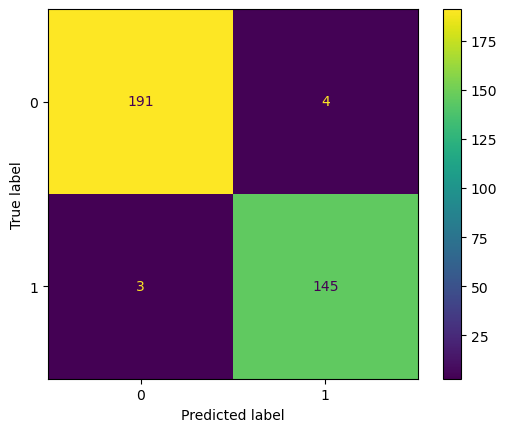

In [137]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Visualize the tree

In [138]:
from sklearn.tree import plot_tree

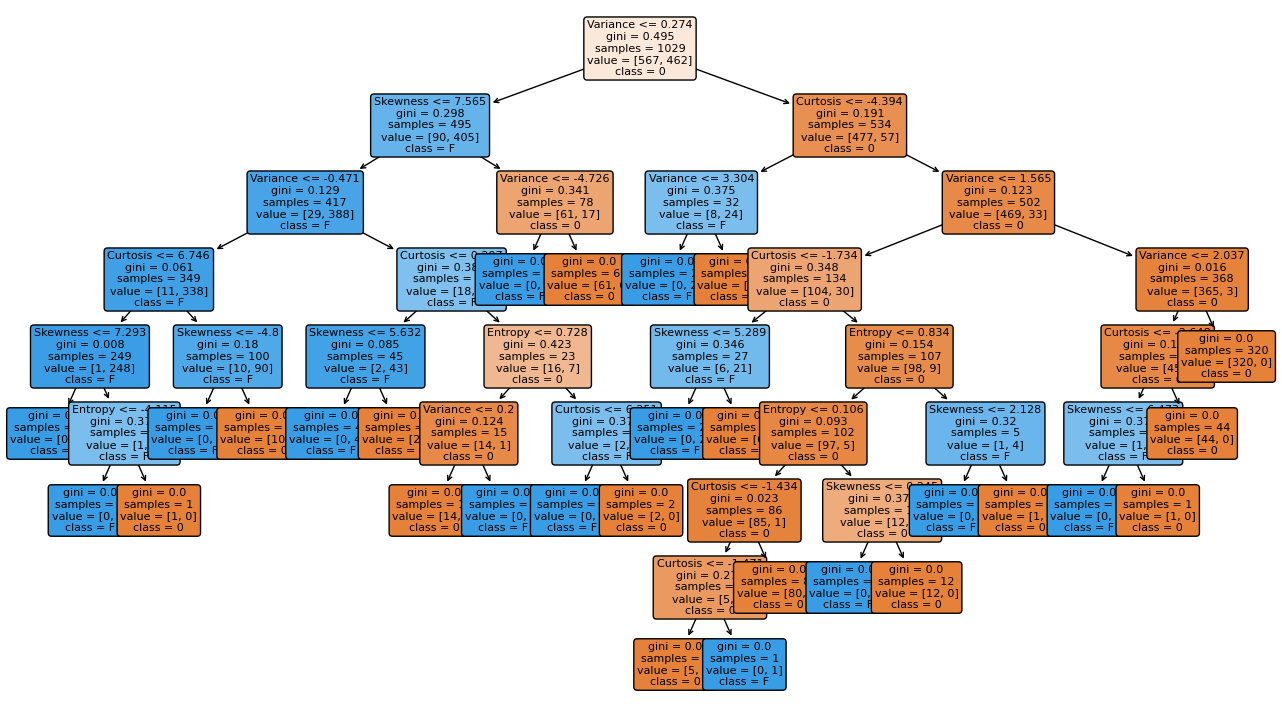

In [139]:
plt.figure(figsize=(16,9))
plot_tree(clf_tree, fontsize = 8, feature_names = x.columns, filled = True, precision = 3, class_names = ['0', 'F'], rounded = True);
plt.savefig('images/tree.png')

<BarContainer object of 4 artists>

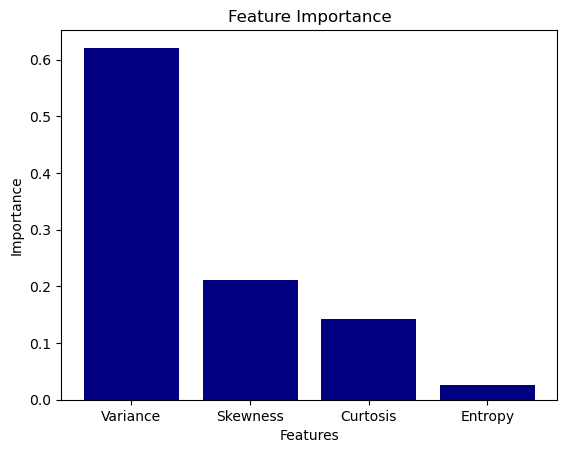

In [140]:
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, clf_tree.feature_importances_, color = 'navy')

In [141]:
# read the feature from user and predict note is fake or original
Var = float(input("Enter Variance"))
Ske = float(input("Enter Skewness"))
Cur = float(input("Enter Curtosis"))
Ent = float(input("Enter Entropy"))

#Note: Can use convert list to np.array
#Note: Dataframe as pd.DataFrame(data = [[Var, Ske, Cur, Ent]], columns = x.columns)
#inp = [[Var, Ske, Cur, Ent]]
inp = pd.DataFrame(data = [[Var, Ske, Cur, Ent]], columns = x.columns)
out = clf_tree.predict(inp)
print("Result :")
if out[0] == 1:
    print("Fake Note")
else:
    print("Original Note")

Enter Variance 2
Enter Skewness 2
Enter Curtosis 2
Enter Entropy 2


Result :
Original Note


In [144]:
# Give the name of dataframe throgh x columns
new_df = pd.DataFrame(data = [[3.45660, 9.52280, -4.0112, -3.59440],
                           [0.40614, 1.34920, -1.4501, -0.55949],
                           [3.86600, -2.63830, 1.9242, 0.10645]],
                           columns=x.columns)
new_df

,Variance,Skewness,Curtosis,Entropy
0,3.45660,9.5228,-4.0112,-3.59440
1,0.40614,1.3492,-1.4501,-0.55949
2,3.86600,-2.6383,1.9242,0.10645


In [145]:
clf_tree.predict(new_df)

array([0, 1, 0], dtype=int64)

# DataSet: Petrol Consumption

In [146]:
df_pc

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [148]:
# Apply regressive when output variable is category 
df_pc.shape

(48, 5)

In [149]:
df_pc.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [153]:
# Manual Selection of Feature
x_pc = df_pc.drop('Petrol_Consumption', axis=1)

y_pc = df_pc['Petrol_Consumption']

In [155]:
x_pc.corrwith(y_pc)


Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

In [159]:
# Apply Non-Linear Regression as corelation is not exist

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

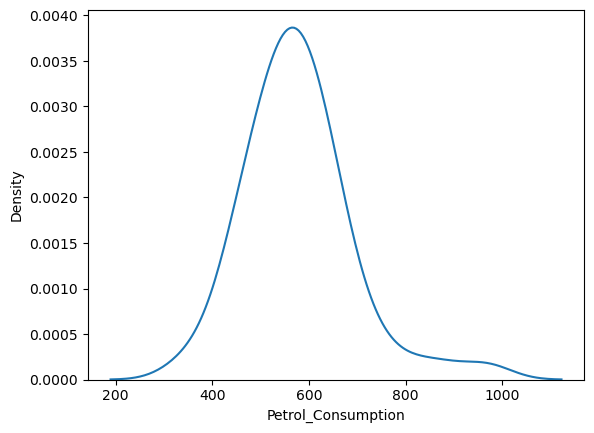

In [161]:
sns.kdeplot(y_pc)

In [162]:
x_pc.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333
std,0.950770,573.623768,3491.507166,0.055470
min,5.000000,3063.000000,431.000000,0.451000
25%,7.000000,3739.000000,3110.250000,0.529750
50%,7.500000,4298.000000,4735.500000,0.564500
75%,8.125000,4578.750000,7156.000000,0.595250
max,10.000000,5342.000000,17782.000000,0.724000


In [163]:
# Scaling require is data has large diffrence

### Cross Validation

In [164]:
from sklearn.model_selection import train_test_split

In [166]:
x_pc_train, x_pc_test, y_pc_train, y_pc_test = train_test_split(x_pc, y_pc, random_state=0)

In [167]:
x_pc_test.shape, x_pc_train.shape

((12, 4), (36, 4))

### Build the Model

In [168]:
from sklearn.tree import DecisionTreeRegressor

In [169]:
regr_tree  = DecisionTreeRegressor()

In [170]:
regr_tree.fit(x_pc_train, y_pc_train)

DecisionTreeRegressor()

In [173]:
# Prediction on unseen data
y_pc_pred = regr_tree.predict(x_pc_test)
y_pc_pred

array([541., 414., 628., 699., 628., 640., 648., 649., 414., 464., 498.,
       699.])

### Check the performance of the Model

In [174]:
result = pd.DataFrame({
    'Actual':y_pc_test,
    'Predicted':y_pc_pred
})
result


,Actual,Predicted
29,534,541.0
4,410,414.0
26,577,628.0
30,571,699.0
32,577,628.0
37,704,640.0
34,487,648.0
40,587,649.0
7,467,414.0
10,580,464.0


In [175]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [176]:
mean_absolute_error(y_pc_test, y_pc_pred)

72.41666666666667